<a href="https://colab.research.google.com/github/faisalnawazmir/Econometrics-ML_for_Finance/blob/main/ARIMA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import numpy as np
import pickle
%matplotlib inline

In [30]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [93]:
file = r'/gdrive/My Drive/data/UKHP.xls'
data = pd.read_excel(file)
data.head()

,Month,Average House Price
0,1991-01-01,53051.721106
1,1991-02-01,53496.798746
2,1991-03-01,52892.861606
3,1991-04-01,53677.435270
4,1991-05-01,54385.726747


In [95]:
with open(file + '.pickle', 'wb') as handle:
  pickle.dump(data, handle)

In [96]:
data['dhp'] = data['Average House Price'].\
transform(lambda x : (x - x.shift(1))/x.shift(1)*100)

In [97]:
data = data.dropna()
data.head()

,Month,Average House Price,dhp
1,1991-02-01,53496.798746,0.838950
2,1991-03-01,52892.861606,-1.128922
3,1991-04-01,53677.435270,1.483326
4,1991-05-01,54385.726747,1.319533
5,1991-06-01,55107.375085,1.326908


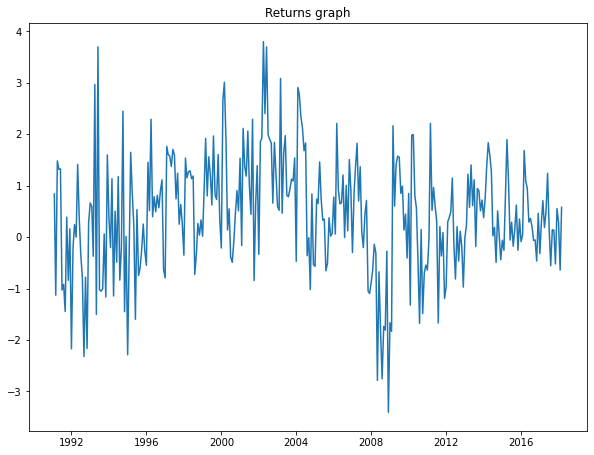

In [98]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(data['Month'],data['dhp'])
plt.title("Returns graph")
plt.show()

In [38]:
acf,q,pval = smt.acf(data['dhp'],nlags=12,qstat=True)
pacf = smt.pacf(data['dhp'],nlags=12)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [39]:
correlogram = pd.DataFrame({'acf':acf[1:],
'pacf':pacf[1:],
'Q':q,
'p-val':pval})
correlogram

,acf,pacf,Q,p-val
0,0.357530,0.358630,42.056495,8.867420e-11
1,0.418110,0.335185,99.749962,2.185601e-22
2,0.231136,0.016514,117.435756,2.751958e-25
3,0.182406,-0.019309,128.484575,8.212175e-27
4,0.126357,0.005922,133.803012,3.709054e-27
5,0.130596,0.055526,139.502089,1.276524e-27
6,0.060789,-0.030376,140.740725,3.555650e-27
7,0.096431,0.036471,143.867517,3.719180e-27
8,0.160491,0.148973,152.555817,2.604935e-28
9,0.136606,0.040527,158.870433,5.542515e-29


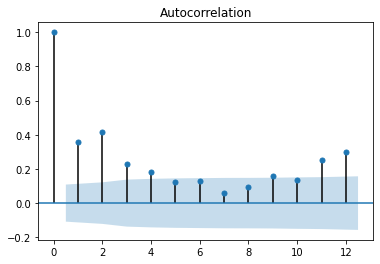

In [40]:
plot_acf(data['dhp'], lags=12);

In [41]:
res = smt.ARIMA(data['dhp'], order=(1,0,1)).fit()
print(res.summary())

                              ARMA Model Results                              
Dep. Variable:                    dhp   No. Observations:                  326
Model:                     ARMA(1, 1)   Log Likelihood                -462.710
Method:                       css-mle   S.D. of innovations              1.000
Date:                Thu, 12 Nov 2020   AIC                            933.420
Time:                        12:20:09   BIC                            948.567
Sample:                             0   HQIC                           939.465
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4286      0.141      3.031      0.003       0.151       0.706
ar.L1.dhp      0.8224      0.060     13.781      0.000       0.705       0.939
ma.L1.dhp     -0.5417      0.088     -6.179      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [42]:
print(res.aic)
print(res.bic)

933.4199014912797
948.5674910167465


In [43]:
smt.ArmaProcess.from_estimation(res).isstationary

True

In [44]:
res1 = smt.arma_order_select_ic(data['dhp'],\
max_ar=5, max_ma=5, ic=['aic', 'bic'],\
fit_kw={'method':'css-mle',
'solver':'bfgs'})

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [45]:
print('AIC')
print(res1.aic)
print('SBIC')
print(res1.bic)

AIC
             0           1           2           3           4           5
0  1001.263704  977.402015  935.508251  931.454458  930.294945  929.950512
1   958.791442  933.419902  925.648740  923.788834  924.499886  926.106244
2   922.460039  924.408036  926.242696  926.408807  925.977423  928.000364
3   924.401584  926.434415  928.183411  925.957411  925.429584  923.845552
4   926.261040  928.258696  928.377708  930.371143  931.083906  930.382511
5   928.245355  927.641964  927.246082  929.121257  917.127789  926.135325
SBIC
             0           1           2           3           4           5
0  1008.837498  988.762707  950.655841  950.388945  953.016330  956.458793
1   970.152134  948.567491  944.583227  946.510218  951.008168  956.401423
2   937.607629  943.342523  948.964081  952.917089  956.272602  962.082440
3   943.336070  949.155800  954.691693  956.252590  959.511661  961.714526
4   948.982425  954.766978  958.672887  964.453219  968.952880  972.038382
5   954.753636  

In [46]:
print(res1.aic_min_order)
print(res1.bic_min_order)

(5, 4)
(2, 0)


#Forecasting using ARMA models

In [47]:
import pickle
import statsmodels.tsa.api as smt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 1 to 326
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Month                326 non-null    datetime64[ns]
 1   Average House Price  326 non-null    float64       
 2   dhp                  326 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 10.2 KB


Convert the data frame index to a datetime index then show the first elements:
https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea

In [63]:
data['datetime'] = pd.to_datetime(data['Month'])
data = data.set_index('datetime')
data.drop(['Month'], axis=1, inplace=True)
data.head()

,Average House Price,dhp
datetime,,
1991-02-01,53496.798746,0.838950
1991-03-01,52892.861606,-1.128922
1991-04-01,53677.435270,1.483326
1991-05-01,54385.726747,1.319533
1991-06-01,55107.375085,1.326908


In [64]:
#data_insample = data[1:299]
data_insample = data['1991-02-01':'2015-12-01']
data_insample.tail()

,Average House Price,dhp
datetime,,
2015-08-01,195279.056782,-0.174970
2015-09-01,195585.011303,0.156676
2015-10-01,196807.127979,0.624852
2015-11-01,196305.114697,-0.255079
2015-12-01,196999.272687,0.353612


In [67]:
model = smt.ARIMA(data_insample['dhp'], order=(2,0,0))
res = model.fit()
print(res.summary())

                              ARMA Model Results                              
Dep. Variable:                    dhp   No. Observations:                  299
Model:                     ARMA(2, 0)   Log Likelihood                -427.952
Method:                       css-mle   S.D. of innovations              1.012
Date:                Thu, 12 Nov 2020   AIC                            863.904
Time:                        15:45:33   BIC                            878.706
Sample:                    02-01-1991   HQIC                           869.828
                         - 12-01-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4417      0.137      3.225      0.001       0.173       0.710
ar.L1.dhp      0.2353      0.054      4.337      0.000       0.129       0.342
ar.L2.dhp      0.3406      0.054      6.259      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [78]:
model = smt.ARIMA(data['dhp'], order=(2,0,0))
res = model.fit()
#res.plot_predict('2016-01-01','2018-03-01',dynamic=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


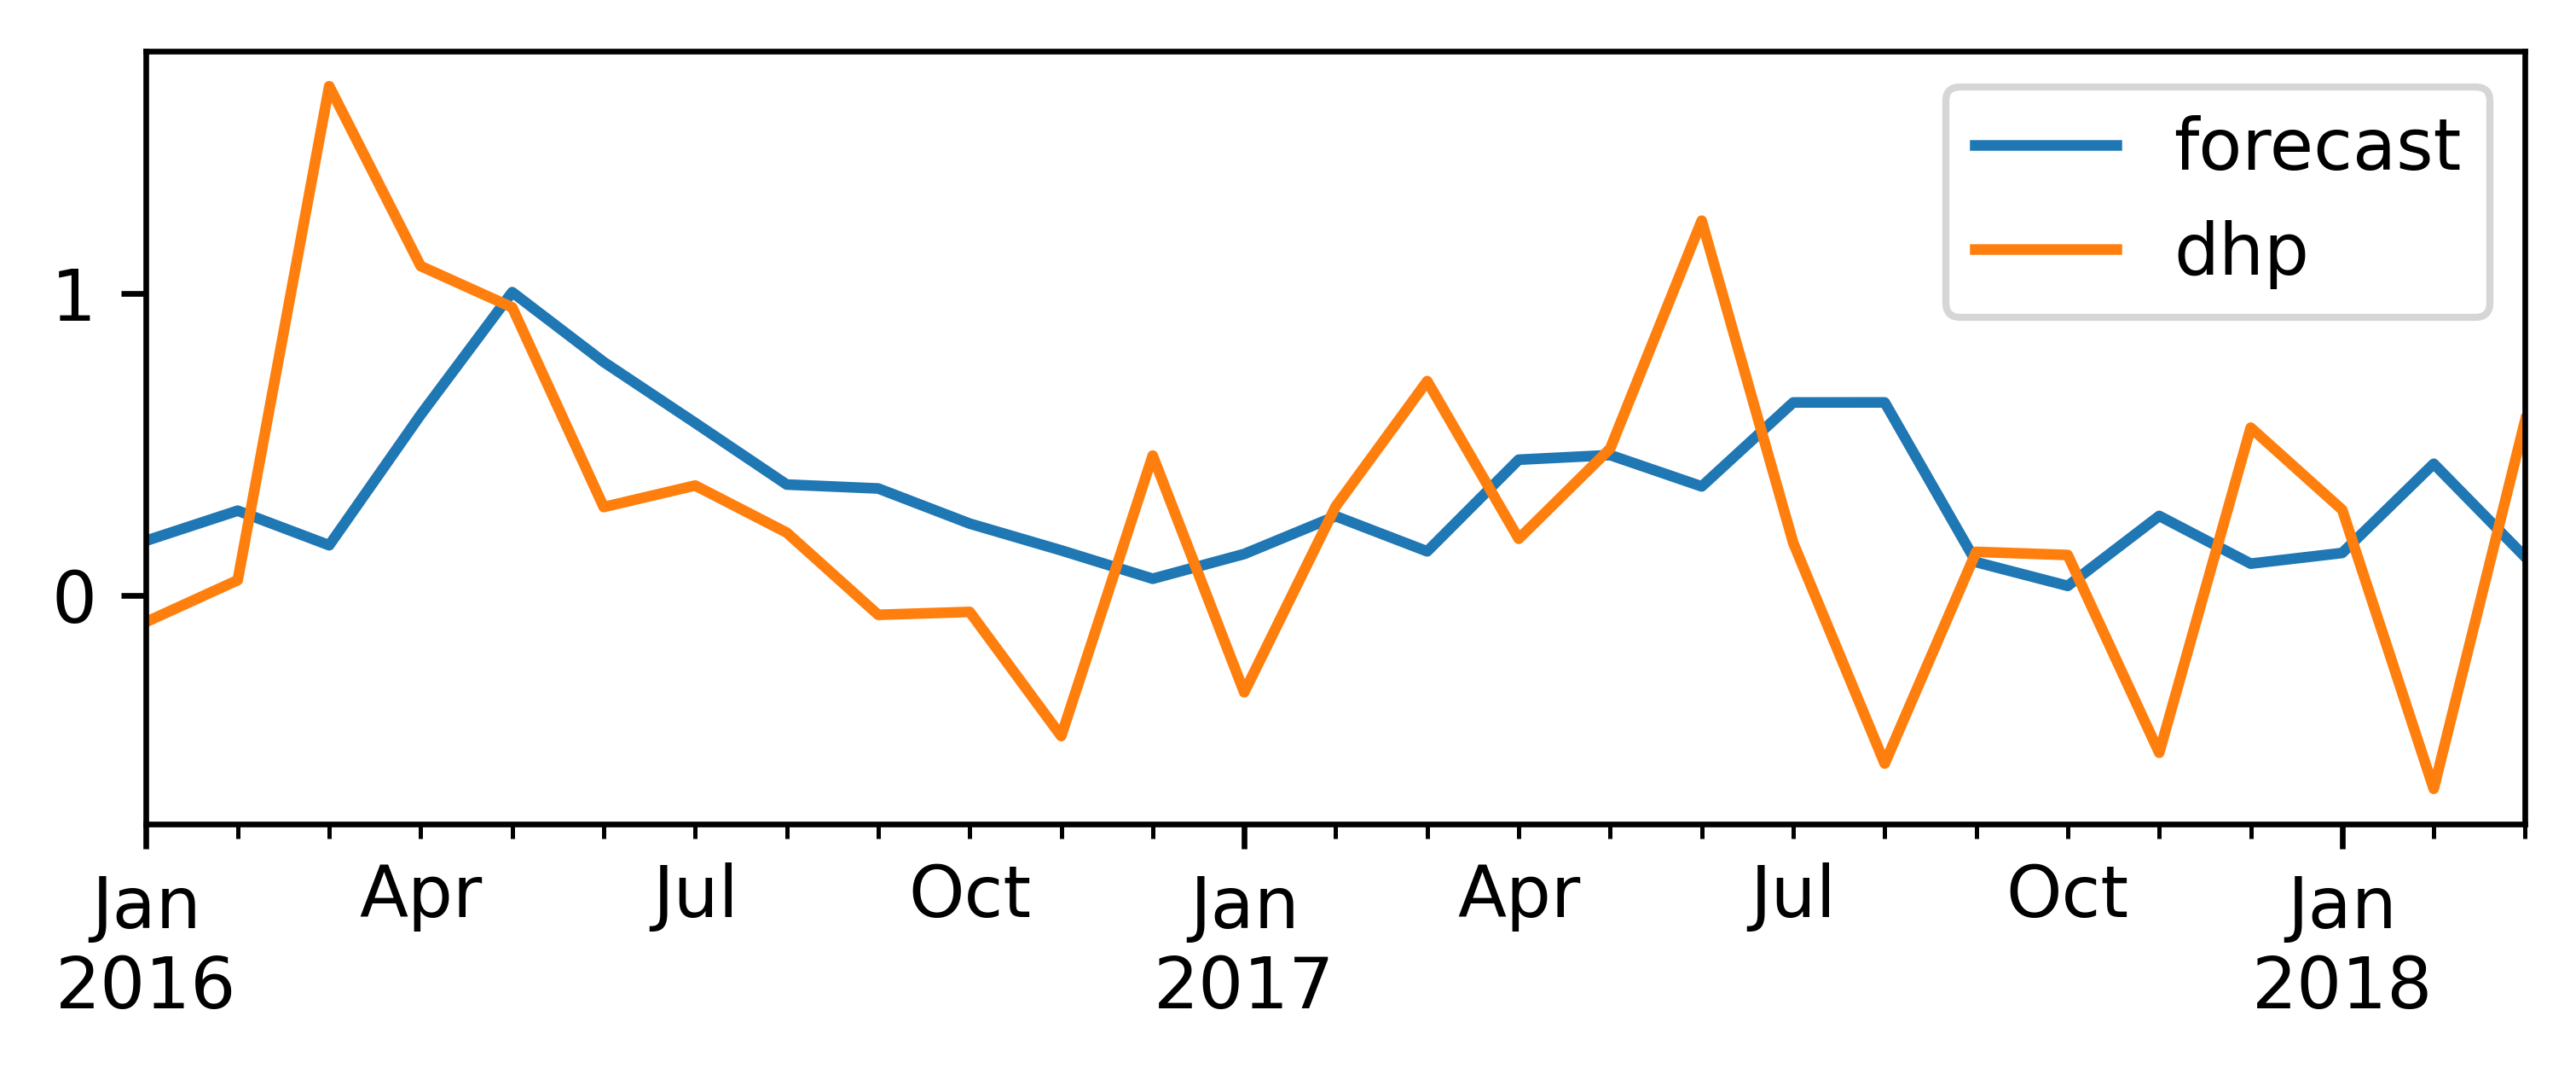

In [89]:
fig=res.plot_predict('2016-01-01','2018-03-01',dynamic=False)
fig.set_dpi(600)
fig.set_size_inches(6, 2)
#fig.figsize=(1,1)
fig.show()


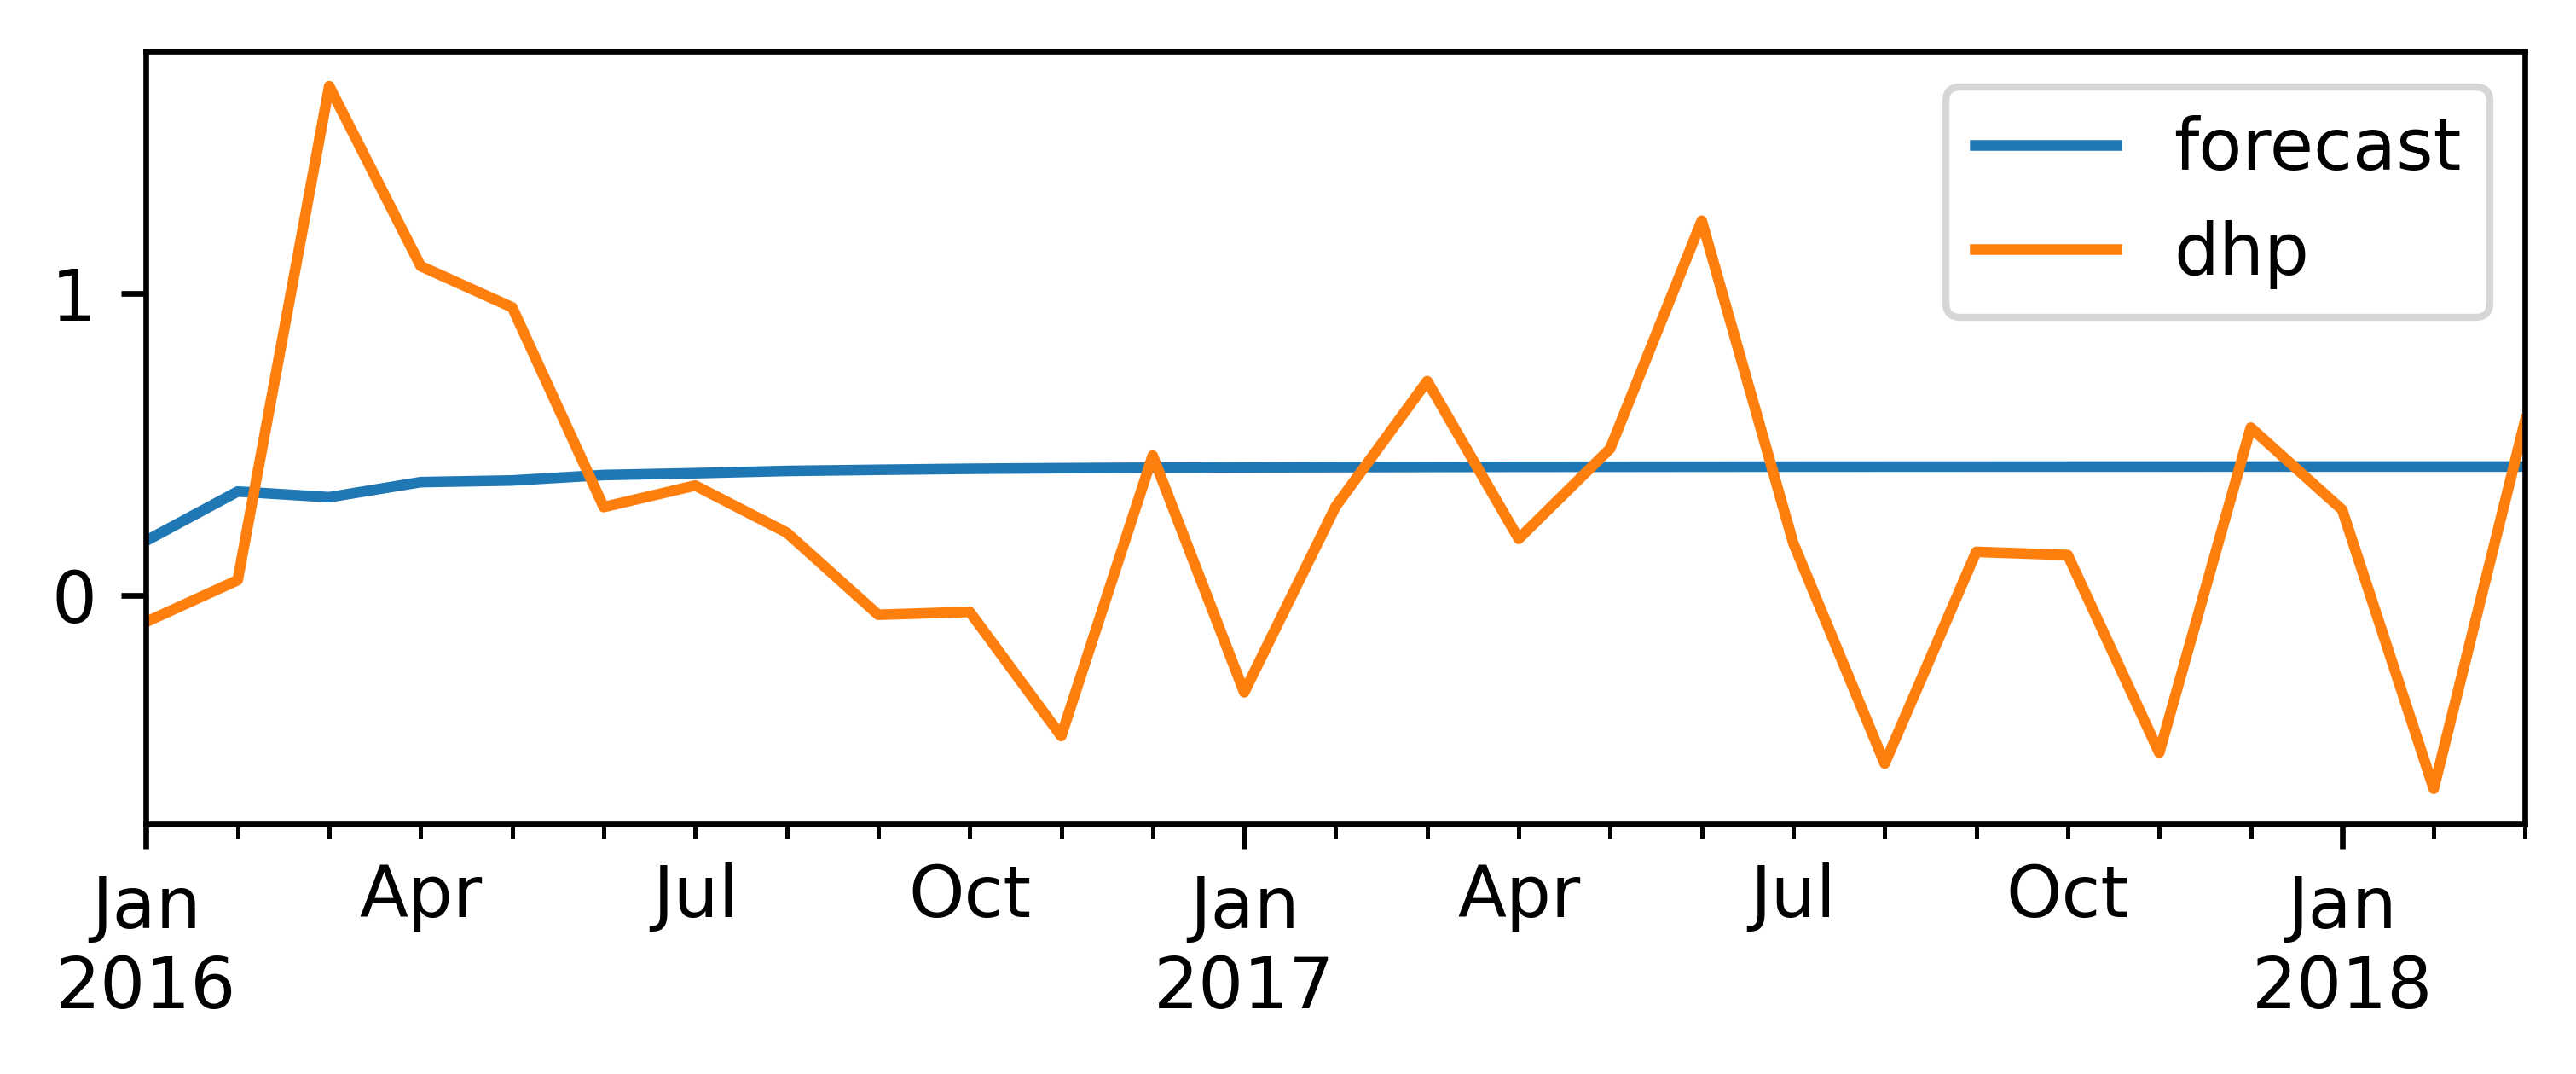

In [90]:
#res.plot_predict(300,326,dynamic=True)
fig = res.plot_predict('2016-01-01','2018-03-01',dynamic=True)
fig.set_dpi(600)
fig.set_size_inches(6, 2)
fig.show()

In [91]:
def rmse(pred, target):
  return np.sqrt(((pred - target) ** 2).mean())
  

In [92]:
data_outsample = data['2016-01-01':'2018-03-01']
pred = res.predict('2016-01-01','2018-03-01',dynamic=False)

stats1 = rmse(pred, data_outsample['dhp'])
print('root mean squared error1: {}'.format(stats1) )

stats2 = sqrt(mean_squared_error(data_outsample['dhp'], pred))
print('root mean squared error2: {}'.format(stats2) )

root mean squared error1: 0.5776465624576502
root mean squared error2: 0.5776465624576503
